# Indicators of Heavy Traffic on I-94

## Introduction

In this project, we will analyse a dataset about the westbound traffic of the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). The dataset was made available by John Hogue and can be found [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

Our analysis aims to determine a few indicators of heavy traffic on I-94. Understanding what indicators contribute to the severity of traffic could aid in making informed and data-driven decisions on how to prepare and potentially reduce the impact of these.

A short description of each of the categories in our dataset are as follows:

* `holiday` - Categorical US National holidays plus regional holiday, Minnesota State Fair
* `temp` - Numeric Average temp in kelvin
* `rain_1h` - Numeric Amount in mm of rain that occurred in the hour
* `snow_1h` - Numeric Amount in mm of snow that occurred in the hour
* `clouds_all` - Numeric Percentage of cloud cover
* `weather_main` - Categorical Short textual description of the current weather
* `weather_description` - Categorical Longer textual description of the current weather
* `date_time` - DateTime Hour of the data collected in local CST time
* `traffic_volume` - Numeric Hourly I-94 ATR 301 reported westbound traffic volume

## The I-94 Traffic Dataset

In [12]:
import pandas as pd

traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

traffic.head()  ## First five rows of dataframe.

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [13]:
traffic.tail()  ## Last five rows of dataframe. 

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [14]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Our data shows us that there are 48203 rows and nine columns. Each entry describes hourly weather features and holidays included for impact on traffic volume between 09:00, 02/10/2012 and 23:00, 30/09/2018. Moreover, there are no non-null values and three different dtypes: object, float64, and int64. 

The [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only recorded westbound traffic (moving from east to west). Therefore, the results of our analysis will only be relevant for westbound traffic in proximity of this station and not for the entire I-94 highway. 

## Analyzing Traffic Volume

We're going to start our analysis by examining the distribution of the traffic_volume column.

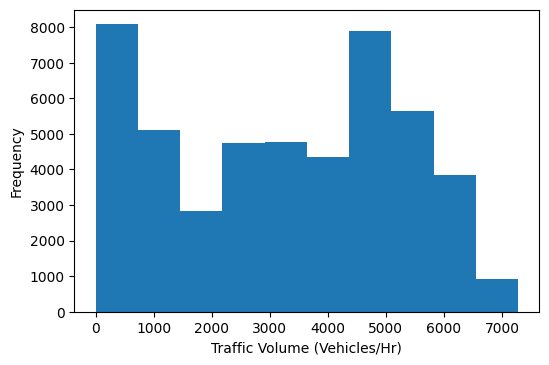

In [20]:
import matplotlib.pyplot as plt 
%matplotlib inline 

traffic["traffic_volume"].plot.hist()
plt.xlabel("Traffic Volume (Vehicles/Hr)")
plt.show()

In [16]:
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 9:00, 02/10/2012 and 23:00, 30/09/2018, the hourly traffic volume ranged from a minimum of 0 to a maximum of 7280, with an average of 3260 and a median of 3380.

The histogram shows us that there are two peaks ~8000 incidence values 0-500 vehicles/hr and 4500-5000 vehicles/hr. These two peaks may represent differences in traffic volume due to the time of day, i.e. periods at night may record less traffic volume than during the day-time, rush-hour periods.  

With this in mind, let's compare day-time with night-time data to see if different periods of the day influence traffic volume:

## Traffic Volume: Day vs. Night

As the recorded data were collected every hour of the day, we will divide the dataset into two parts. Although not perfect, these represent day-time and night-time periods:

* Day-time: Between 07:00-19:00
* Night-time: Between 19:00-07:00

In [17]:
## Converting the date_time column to datetime ##

traffic["date_time"] = pd.to_datetime(traffic["date_time"])

## Isolating day and night time data ##

day_time = traffic.copy()[(traffic["date_time"].dt.hour >= 7) & (traffic["date_time"].dt.hour < 19)]
print(day_time.shape)

night_time = traffic.copy()[(traffic["date_time"].dt.hour >= 19) | (traffic["date_time"].dt.hour < 7)]
print(night_time.shape)

(23877, 9)
(24327, 9)


## Traffic Volume: Day vs. Night (II)

Now to compare the traffic volume at night and during the day:

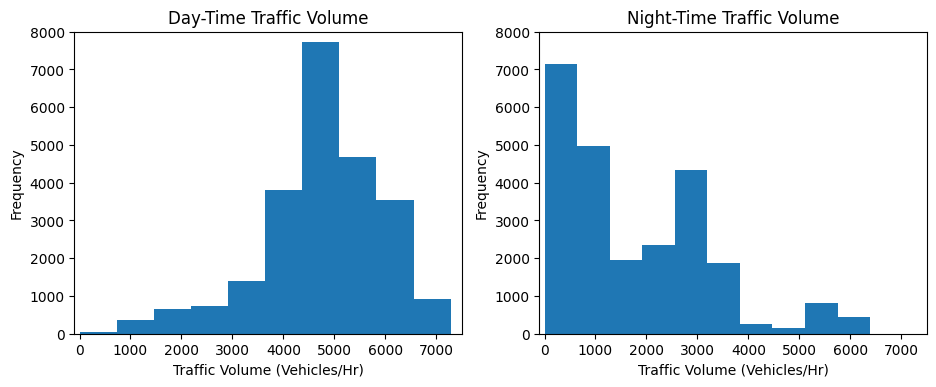

In [35]:
## Plotting Histograms for Day and Night Traffic Volume ##

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.hist(day_time["traffic_volume"])
plt.title("Day-Time Traffic Volume")
plt.xlabel("Traffic Volume (Vehicles/Hr)")
plt.ylabel("Frequency")
plt.xlim(-100,7500)
plt.ylim(0,8000)

plt.subplot(1,2,2)
plt.hist(night_time["traffic_volume"])
plt.title("Night-Time Traffic Volume")
plt.xlabel("Traffic Volume (Vehicles/Hr)")
plt.ylabel("Frequency")
plt.xlim(-100,7500)
plt.ylim(0,8000)

plt.show()

In [33]:
## Descriptive Statistics ##

day_time["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [34]:
night_time["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram for the daytime traffic volume shows that the distribution is left-skewed, meaning that most traffic volume is on the higher end of the range - confirmed by only 25% of the traffic volume being below 4252 vehicles/hr while the remaining 75% being above this volume.

In contrast, the histogram for night-time data is right-skewed, meaning that most traffic volume values are low. Statistically, 75% of the traffic volume was 2819 vehicles/hr or less. 

From this, we can see that the majority of traffic volume is in the daytime. Though there are instances of high traffic volumes during the night, the frequency of these is relatively few. As we aim to find indicators of heavy traffic, we will focus on daytime data moving forward.

## Time Indicators

One possible indicator of heavy traffic is time. For example, there may be more people using the roads during certain months, days, and times of the day.

Therefore, we will look at a few line plots showing how traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

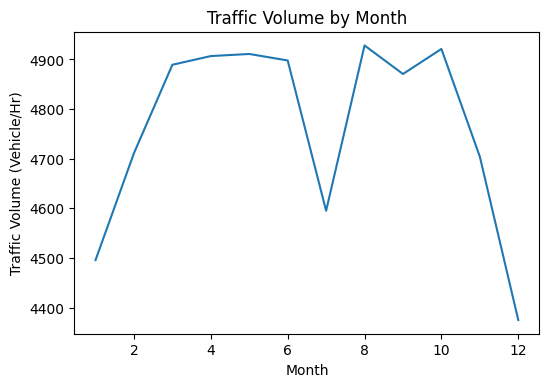

In [48]:
## Getting Line Graph for Average Traffic Volume for Each Month ##

day_time["month"] = day_time["date_time"].dt.month  # creating new column where each value describes the month
by_month = day_time.groupby("month").mean()  # group dataset by month column with mean as aggregate function.
by_month["traffic_volume"].plot.line()
plt.title("Traffic Volume by Month")
plt.ylabel("Traffic Volume (Vehicle/Hr)")
plt.xlabel("Month")
plt.show()

The line graph shows that the traffic volume is lowest between November and February and is highest between March-June and August-October. There is one exception, which is July.

Let's investigate how the traffic volume has changed in July of each year:

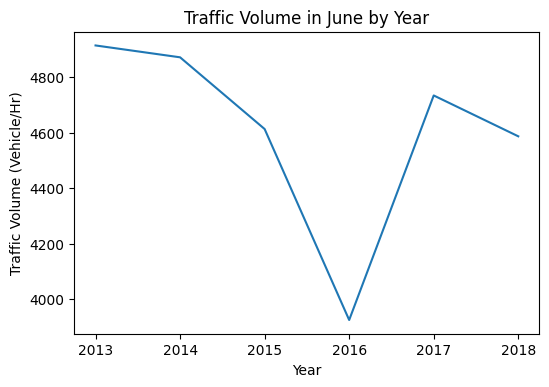

In [55]:
day_time["year"] = day_time["date_time"].dt.year
only_july = day_time[day_time["month"] == 7]  # creating a df with July as the filter.
only_july.groupby("year").mean()["traffic_volume"].plot.line() # grouping dataset by year; filtering for "traffic_volume"
plt.title("Traffic Volume in June by Year")
plt.ylabel("Traffic Volume (Vehicle/Hr)")
plt.xlabel("Year")
plt.show()

We can see that there was quite a dramatic fall in traffic volume in 2016 July. A brief Google search (found [here](https://www.mlive.com/news/ann-arbor/2016/06/road_construction_projects_tha.html)) suggests that road construction was taking place in the early days of this month.

Knowing this information, we can deduce that this result was an anomaly, and assume that traffic volume is normally highest in March-October, each year - suggesting that traffic volume is highest in the warmer months and lowest in the colder months (November-February).

## Time Indicators - Day of the Week